In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


df = pd.read_csv("Simulation_Outputs", delimiter="\t")

df2=pd.read_csv("consommation")

In [69]:
df

,TIME,Temperature_ext_C,Temperature_int_C,Temperature_op_C,QHeat_kJ_h,QCool_kJ_h,Unnamed: 6
0,1.0,0.50,20.0,20.000000,0.000000,0.0,NaN
1,2.0,0.10,19.5,19.609375,1700.066294,0.0,NaN
2,3.0,-0.75,19.0,19.295162,1347.984793,0.0,NaN
3,4.0,-1.45,19.0,19.246684,1554.008583,0.0,NaN
4,5.0,-1.95,19.0,19.203637,1723.533501,0.0,NaN
...,...,...,...,...,...,...,...
8755,8756.0,1.95,19.0,18.908874,2071.970628,0.0,NaN
8756,8757.0,1.55,19.0,18.893456,2156.951919,0.0,NaN
8757,8758.0,1.15,19.0,18.879541,2237.998779,0.0,NaN
8758,8759.0,0.70,19.0,18.866594,2321.958568,0.0,NaN


In [70]:
col_2 = df.iloc[:, 1].values
col_3 = df.iloc[:, 2].values
temp_ext= pd.DataFrame(col_2.reshape(-1, 24))
temp_ext_int = pd.DataFrame(np.hstack((col_2.reshape(-1, 24), col_3.reshape(-1, 24))))


In [71]:
temp_ext_int["clusters"]=df2["clusters"]

In [72]:
temp_ext["clusters"]=df2["clusters"]

In [73]:
def standardize_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [74]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVC": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [75]:
def evaluate_models_split(X_train, X_test, y_train, y_test , models):
  
    
    results = {}
    
    for name, model in models.items():
        print(f"\n Évaluation de {name} avec train_test_split...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred) 

        results[name] = {"f1_score": f1, "accuracy": accuracy}
        
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
        plt.xlabel('Prédictions')
        plt.ylabel('Vraies classes')
        plt.title(f'Matrice de confusion - {name}')
        plt.show()
        
        print(f"{name} - Accuracy: {accuracy:.4f} - F1 Score: {f1:.4f}")
        print("###################################################################")
    
    return results


In [76]:


def evaluate_models_cv(X, y, models, cv=4):
    results = {}

    for name, model in models.items():
        print(f"\n Évaluation de {name} avec Cross Validation ({cv}-folds)...")

        scoring = ["accuracy", "f1_weighted"]
        scores = {}

        for metric in scoring:
            score = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=cv, shuffle=True, random_state=42), scoring=metric)
            scores[metric] = np.mean(score)  
        results[name] = scores

        print(f"{name} - Accuracy: {scores['accuracy']:.4f} - F1 Score: {scores['f1_weighted']:.4f}")
        print("###################################################################")

    return results


*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec train_test_split...


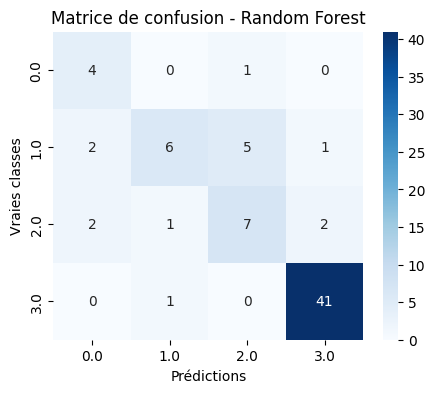

Random Forest - Accuracy: 0.7945 - F1 Score: 0.7874
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


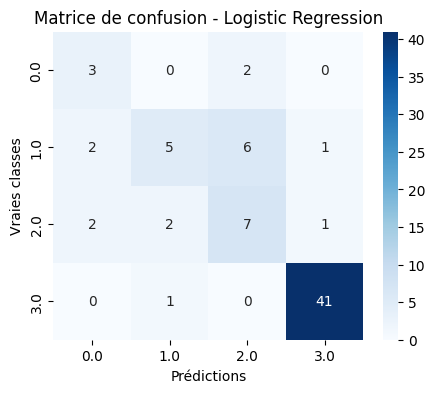

Logistic Regression - Accuracy: 0.7671 - F1 Score: 0.7617
###################################################################

 Évaluation de SVC avec train_test_split...


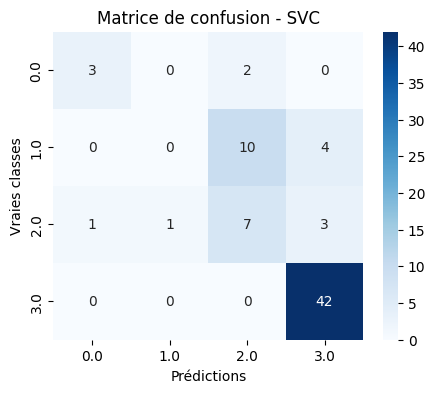

SVC - Accuracy: 0.7123 - F1 Score: 0.6510
###################################################################

 Évaluation de KNN avec train_test_split...


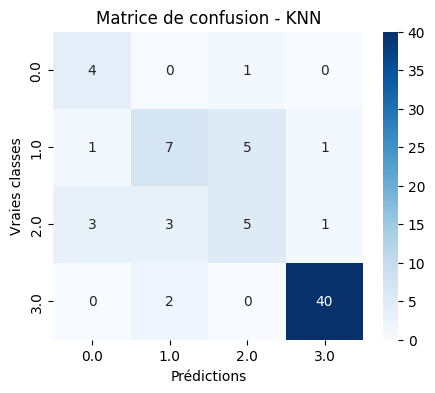

KNN - Accuracy: 0.7671 - F1 Score: 0.7648
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


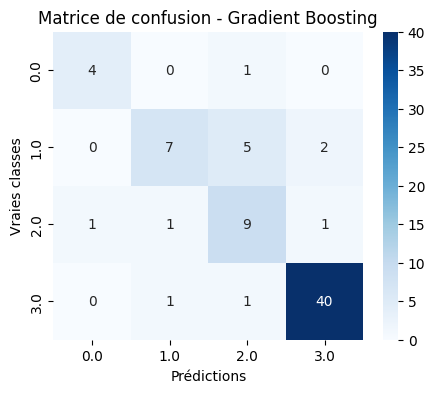

Gradient Boosting - Accuracy: 0.8219 - F1 Score: 0.8187
###################################################################


In [77]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X=temp_ext.drop(columns=["clusters"])
y=temp_ext["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [78]:
print("*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 4 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.7835 - F1 Score: 0.7820
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8082 - F1 Score: 0.7944
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8109 - F1 Score: 0.8024
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.7808 - F1 Score: 0.7852
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.8027 - F1 Score: 0.8019
##################

*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************

 Évaluation de Random Forest avec train_test_split...


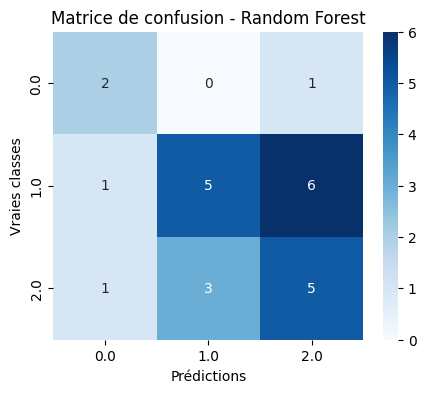

Random Forest - Accuracy: 0.5000 - F1 Score: 0.5000
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


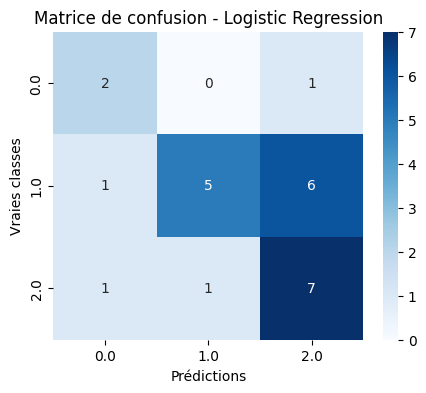

Logistic Regression - Accuracy: 0.5833 - F1 Score: 0.5775
###################################################################

 Évaluation de SVC avec train_test_split...


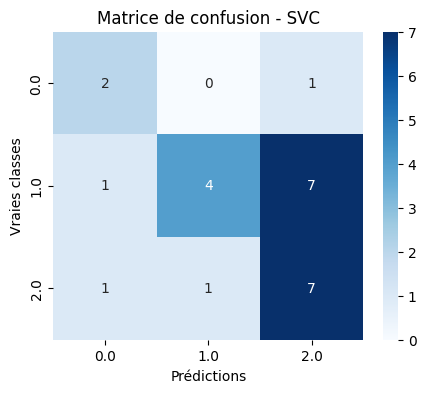

SVC - Accuracy: 0.5417 - F1 Score: 0.5255
###################################################################

 Évaluation de KNN avec train_test_split...


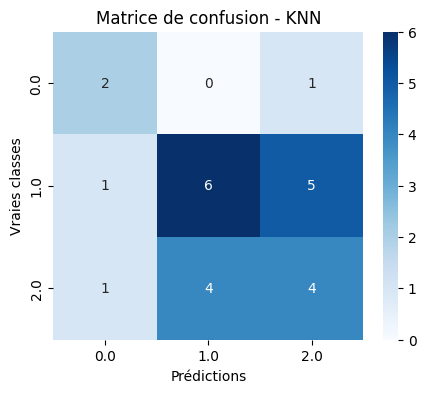

KNN - Accuracy: 0.5000 - F1 Score: 0.5021
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


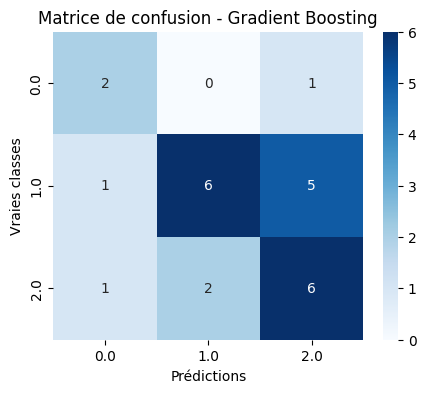

Gradient Boosting - Accuracy: 0.5833 - F1 Score: 0.5857
###################################################################


In [83]:
print("*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************")
temp_ext2=temp_ext[temp_ext["clusters"]!=3]
X=temp_ext2.drop(columns=["clusters"])
y=temp_ext2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [84]:
print("*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

*************************************************Prédiction en fonction de TEXT avec 3 clusters*************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.5968 - F1 Score: 0.5846
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.5968 - F1 Score: 0.5886
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.5793 - F1 Score: 0.5598
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.5971 - F1 Score: 0.5751
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.6305 - F1 Score: 0.6194
##################

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


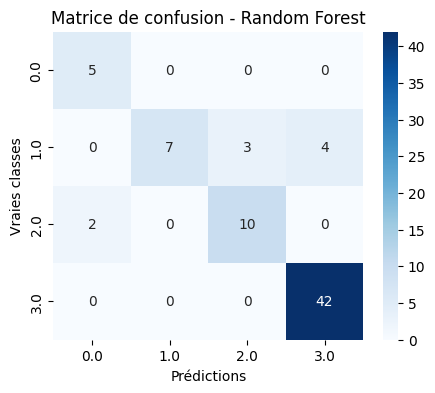

Random Forest - Accuracy: 0.8767 - F1 Score: 0.8656
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


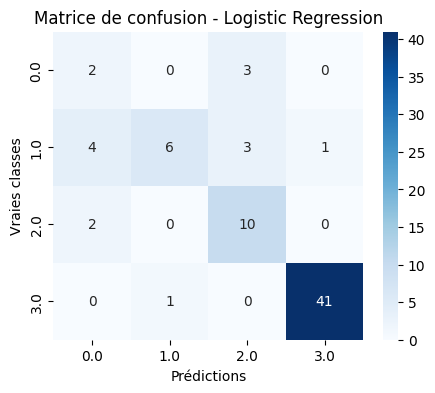

Logistic Regression - Accuracy: 0.8082 - F1 Score: 0.8097
###################################################################

 Évaluation de SVC avec train_test_split...


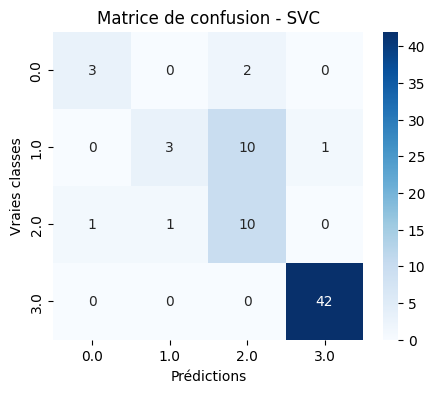

SVC - Accuracy: 0.7945 - F1 Score: 0.7749
###################################################################

 Évaluation de KNN avec train_test_split...


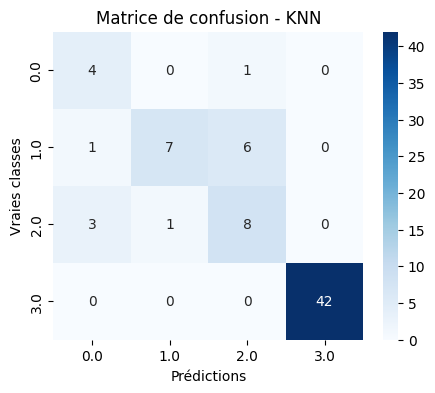

KNN - Accuracy: 0.8356 - F1 Score: 0.8369
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


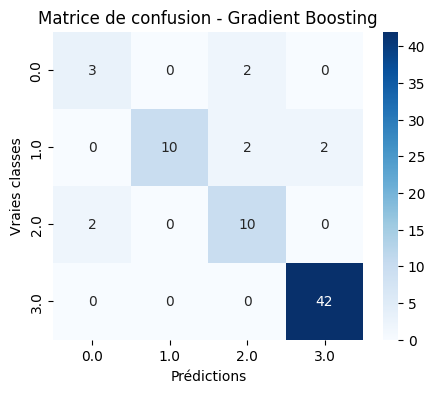

Gradient Boosting - Accuracy: 0.8904 - F1 Score: 0.8893
###################################################################


In [81]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************")
X=temp_ext_int.drop(columns=["clusters"])
y=temp_ext_int["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [82]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT et TINT avec 4 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.9178 - F1 Score: 0.9171
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9095 - F1 Score: 0.9063
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.8713 - F1 Score: 0.8645
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.8658 - F1 Score: 0.8655
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9123 - F1 Score: 0.9125
################

**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************

 Évaluation de Random Forest avec train_test_split...


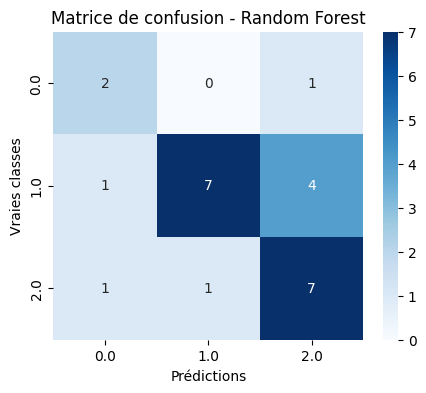

Random Forest - Accuracy: 0.6667 - F1 Score: 0.6714
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


C:\Users\toubia\anaconda3\envs\notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


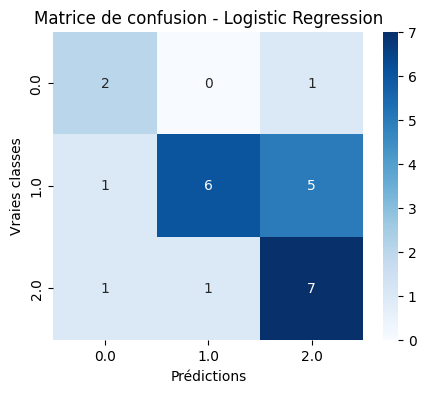

Logistic Regression - Accuracy: 0.6250 - F1 Score: 0.6259
###################################################################

 Évaluation de SVC avec train_test_split...


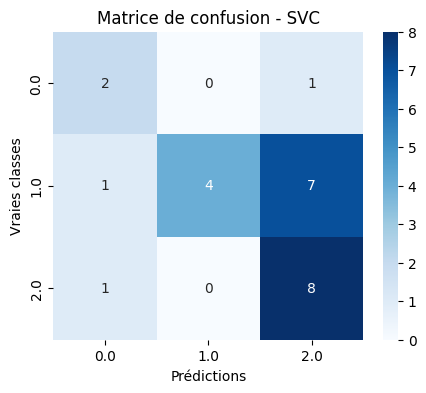

SVC - Accuracy: 0.5833 - F1 Score: 0.5614
###################################################################

 Évaluation de KNN avec train_test_split...


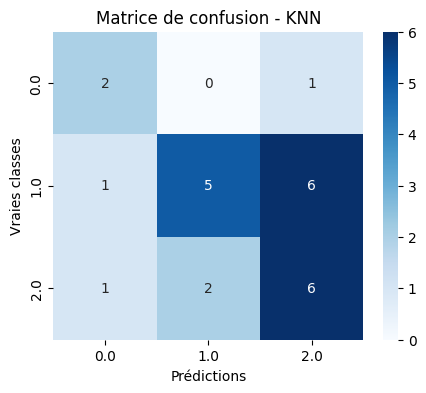

KNN - Accuracy: 0.5417 - F1 Score: 0.5391
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


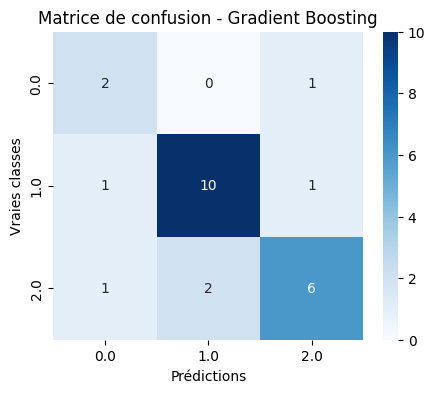

Gradient Boosting - Accuracy: 0.7500 - F1 Score: 0.7528
###################################################################


In [86]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************")
temp_ext_int2=temp_ext_int[temp_ext["clusters"]!=3]
X=temp_ext_int2.drop(columns=["clusters"])
y=temp_ext_int2["clusters"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)

In [87]:
print("**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************")
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

**********************************************Prédiction en fonction de TEXT et TINT avec 3 clusters**********************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...
Random Forest - Accuracy: 0.8072 - F1 Score: 0.7989
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.8069 - F1 Score: 0.8072
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.7727 - F1 Score: 0.7581
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.6885 - F1 Score: 0.6940
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.7647 - F1 Score: 0.7575
################